In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
%matplotlib inline

# We have 3 data sets, load them all in, and clean the data

In [2]:
spray = pd.read_csv('./assets/input/spray.csv')
weather = pd.read_csv('./assets/input/weather.csv')
train = pd.read_csv('./assets/input/train.csv')


In [3]:
#Change the date's in the train set and weather set into a datetime object
train['Date'] = pd.to_datetime(train['Date'])
weather['Date'] = pd.to_datetime(weather['Date'])


In [4]:
#Split and combine on the 2 weather stations so they are all on one date
weather_stn1 = weather[weather['Station']==1]
weather_stn2 = weather[weather['Station']==2]
weather_stn1 = weather_stn1.drop('Station', axis=1)
weather_stn2 = weather_stn2.drop('Station', axis=1)
weather = weather_stn1.merge(weather_stn2, on='Date')

#replace all the weird M's, "-"'s, and T's with -1's to be removed later
weather = weather.replace('M', -1)
weather = weather.replace('-', -1)
weather = weather.replace('T', -1)
weather = weather.replace(' T', -1)
weather = weather.replace('  T', -1)

#merge the train set with the weather set so the train set has additional features 
df = train.merge(weather, how = 'inner', on = 'Date', copy = False)

In [6]:
#Create Month, Date, and Year Columns
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Day'] = df['Date'].dt.day

In [7]:
df

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,...,SnowFall_y,PrecipTotal_y,StnPressure_y,SeaLevel_y,ResultSpeed_y,ResultDir_y,AvgSpeed_y,Month,Year,Day
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,...,-1,0.00,29.44,30.09,5.8,16,7.4,5,2007,29
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,...,-1,0.00,29.44,30.09,5.8,16,7.4,5,2007,29
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,...,-1,0.00,29.44,30.09,5.8,16,7.4,5,2007,29
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,...,-1,0.00,29.44,30.09,5.8,16,7.4,5,2007,29
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,...,-1,0.00,29.44,30.09,5.8,16,7.4,5,2007,29
5,2007-05-29,"1500 West Webster Avenue, Chicago, IL 60614, USA",CULEX RESTUANS,15,W WEBSTER AVE,T045,"1500 W WEBSTER AVE, Chicago, IL",41.921600,-87.666455,8,...,-1,0.00,29.44,30.09,5.8,16,7.4,5,2007,29
6,2007-05-29,"2500 West Grand Avenue, Chicago, IL 60654, USA",CULEX RESTUANS,25,W GRAND AVE,T046,"2500 W GRAND AVE, Chicago, IL",41.891118,-87.654491,8,...,-1,0.00,29.44,30.09,5.8,16,7.4,5,2007,29
7,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX PIPIENS/RESTUANS,11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,...,-1,0.00,29.44,30.09,5.8,16,7.4,5,2007,29
8,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX RESTUANS,11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,...,-1,0.00,29.44,30.09,5.8,16,7.4,5,2007,29
9,2007-05-29,"1100 West Chicago Avenue, Chicago, IL 60642, USA",CULEX RESTUANS,11,W CHICAGO,T049,"1100 W CHICAGO, Chicago, IL",41.896282,-87.655232,8,...,-1,0.00,29.44,30.09,5.8,16,7.4,5,2007,29


# EDA

In [8]:
weather = pd.read_csv('./assets/input/weather.csv')
weather['Date'] = pd.to_datetime(weather['Date'])
weather = weather[weather['Tavg'] != 'M']
weather['Tavg'] = weather['Tavg'].astype('int')

temp_dict = {}
for i in range(5, 11):
    temp_dict[i] = pd.Series((weather.groupby(weather['Date'].dt.month).get_group(i))['Tavg']).mean()
avg_temp = pd.DataFrame(list(temp_dict.items()), index=temp_dict.keys())



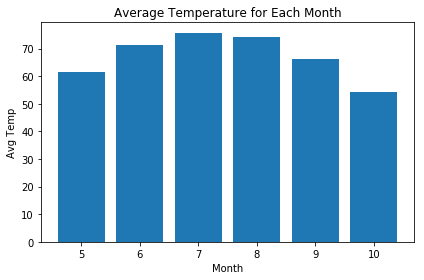

In [9]:
fig = plt.figure()
ax1 = plt.bar(avg_temp[0], avg_temp[1])
plt.xlabel('Month')
plt.ylabel('Avg Temp')
plt.title('Average Temperature for Each Month')
plt.tight_layout();

In [10]:
mos_dict = {}
for i in range(5, 11):
    mos_dict[i] = pd.Series((train.groupby(train['Date'].dt.month).get_group(i))['NumMosquitos']).mean()
avg_num_mos = pd.DataFrame(list(mos_dict.items()), index=mos_dict.keys())

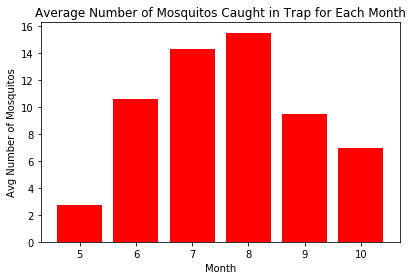

In [11]:
fig = plt.figure()
ax1 = plt.bar(avg_num_mos[0], avg_num_mos[1], color='red')
plt.xlabel('Month')
plt.ylabel('Avg Number of Mosquitos')
plt.title('Average Number of Mosquitos Caught in Trap for Each Month')
plt.tight_layout();

In [12]:
spray['Date'] = pd.to_datetime(spray['Date'])
spray_dict = {}
for i in range(7, 10):
    spray_dict[i] = spray[spray['Date'].dt.month == i].shape[0]
spray_count = pd.DataFrame(list(spray_dict.items()), index=spray_dict.keys())

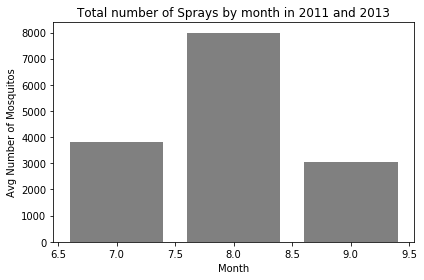

In [13]:
fig = plt.figure()
ax1 = plt.bar(spray_count[0], spray_count[1], color='gray')
plt.xlabel('Month')
plt.ylabel('Avg Number of Mosquitos')
plt.title('Total number of Sprays by month in 2011 and 2013')
plt.tight_layout();

# Spray Data


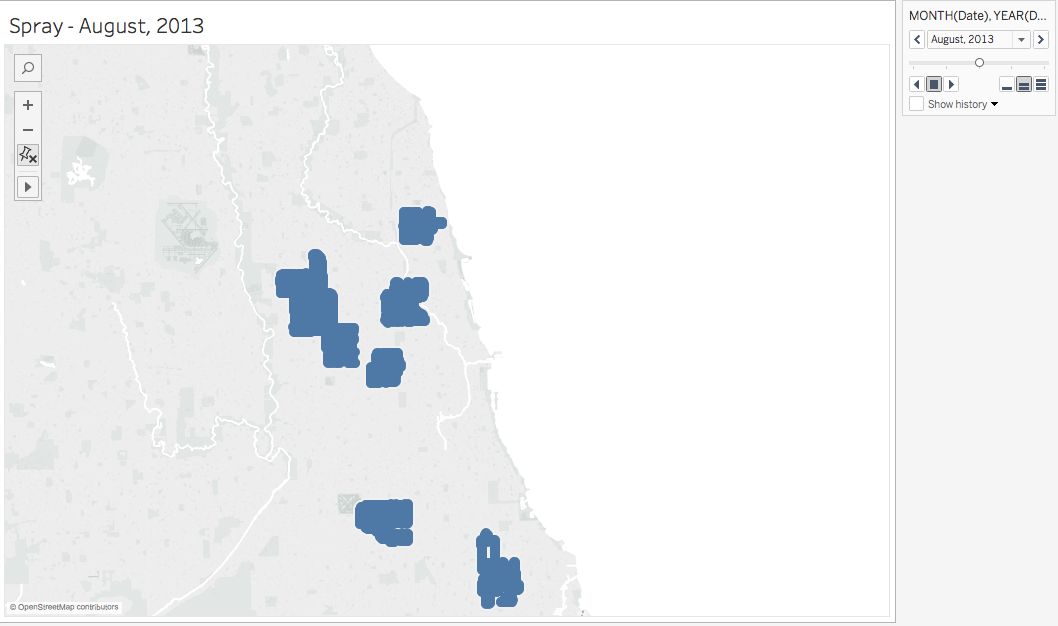

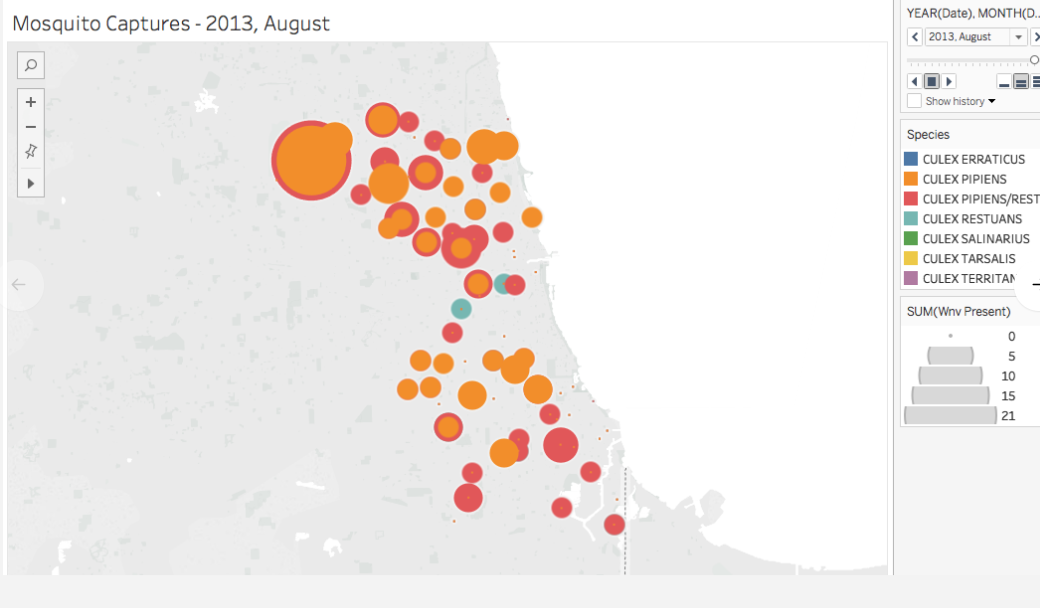

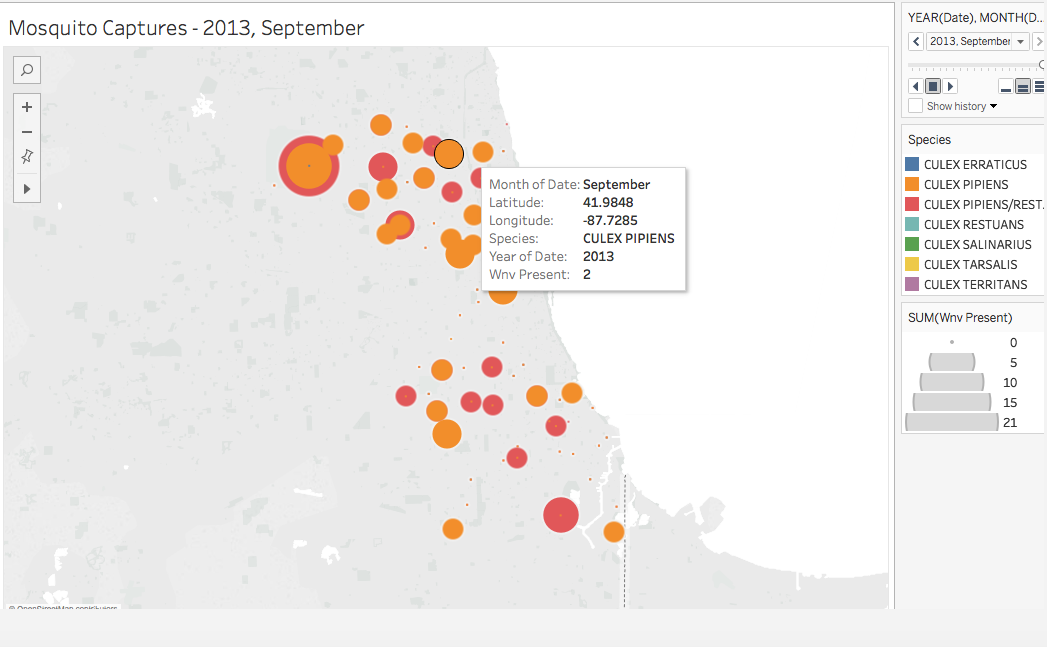

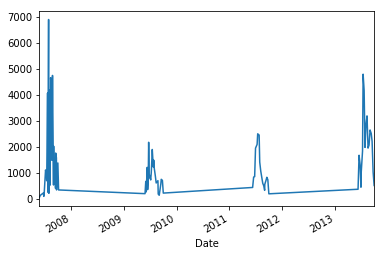

In [14]:
#Number of Mosquitos are on the rise since 2009
df.groupby('Date')['NumMosquitos'].sum().plot()

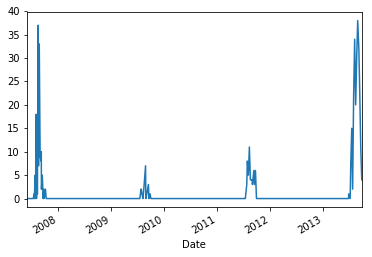

In [15]:
df.groupby('Date')['WnvPresent'].sum().plot()

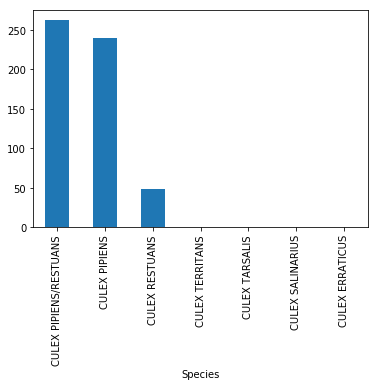

In [16]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
wnv_species = df.groupby('Species')['WnvPresent'].sum().sort_values(ascending = False).plot(kind = 'bar')

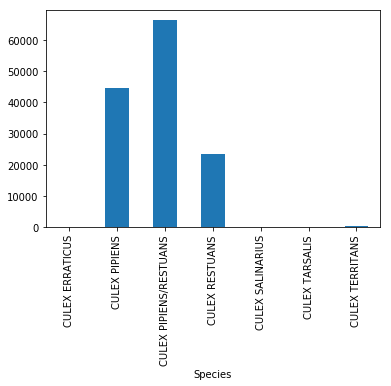

In [17]:
df.groupby('Species')['NumMosquitos'].sum().plot(kind = 'bar')

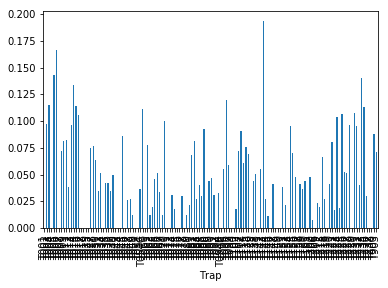

In [18]:
df.groupby('Trap')['WnvPresent'].mean().plot(kind = 'bar')

# Model Testing

In [19]:
df.columns

Index(['Date', 'Address', 'Species', 'Block', 'Street', 'Trap',
       'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy',
       'NumMosquitos', 'WnvPresent', 'Tmax_x', 'Tmin_x', 'Tavg_x', 'Depart_x',
       'DewPoint_x', 'WetBulb_x', 'Heat_x', 'Cool_x', 'Sunrise_x', 'Sunset_x',
       'CodeSum_x', 'Depth_x', 'Water1_x', 'SnowFall_x', 'PrecipTotal_x',
       'StnPressure_x', 'SeaLevel_x', 'ResultSpeed_x', 'ResultDir_x',
       'AvgSpeed_x', 'Tmax_y', 'Tmin_y', 'Tavg_y', 'Depart_y', 'DewPoint_y',
       'WetBulb_y', 'Heat_y', 'Cool_y', 'Sunrise_y', 'Sunset_y', 'CodeSum_y',
       'Depth_y', 'Water1_y', 'SnowFall_y', 'PrecipTotal_y', 'StnPressure_y',
       'SeaLevel_y', 'ResultSpeed_y', 'ResultDir_y', 'AvgSpeed_y', 'Month',
       'Year', 'Day'],
      dtype='object')

In [20]:
#Baseline Accuracy
df['WnvPresent'].value_counts(normalize = True)

0    0.947554
1    0.052446
Name: WnvPresent, dtype: float64

In [21]:
mos_dum = pd.get_dummies(df['Species'], drop_first= True)


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [22]:
#to match test set
X = df.drop(['Date', 'Address', 'Street', 'Trap', 'AddressNumberAndStreet', 'Latitude', 
             'Longitude', 'AddressAccuracy', 'NumMosquitos', 'WnvPresent', 'SeaLevel_x', 'SeaLevel_y',
            'CodeSum_x', 'CodeSum_y', 'Species'], axis = 1)

#make all numbe
for col_name in X:
    X[col_name] = pd.to_numeric(X[col_name])
    
    
X['UNSPECIFIED CULEX'] = 0
X = X.join(mos_dum)

In [23]:
#drop rows with -1
X = X.ix[:,(X != -1).any(axis=0)]

/Users/rytizzle/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app


In [24]:
y = df['WnvPresent']

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y)

In [26]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Xs = ss.fit_transform(X_train)
Xts = ss.transform(X_test)

## GridSearch LR

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
pipe_gs = Pipeline([
    ('ss', ss),
    ('lr', lr)
])

params = {
    'lr__penalty':['l2', 'l1']
}
gs = GridSearchCV(pipe_gs, param_grid = params, cv = 3, scoring = 'roc_auc')
gs.fit(Xs,y_train)

print(gs.best_score_) #train score
print(gs.best_params_)


0.7991629771428091
{'lr__penalty': 'l1'}


In [59]:
lr2 = LogisticRegression(penalty='l2')
lr2.fit(Xs, y_train)
lr2.score(Xts, y_test)

0.9474685953559193

In [60]:
len(lr2.predict_proba(Xs))

7879

In [61]:
probs = [x[1] for x in lr2.predict_proba(Xts)]

roc_auc_score(y_test, probs)

0.8206019529407654

In [62]:
probs_train = [x[1] for x in lr2.predict_proba(Xs)]
roc_auc_score(y_train, probs_train)

0.8166602236839289

# GridSearch with polynomial features for Logistic Regression

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
pipe_gs = Pipeline([
    ('ss', ss),
    ('lr', lr)
])

params = {
    'lr__penalty':['l2', 'l1']
}
gs = GridSearchCV(pipe_gs, param_grid = params, cv = 3, scoring = 'roc_auc')
gs.fit(Xs,y_train)

print(gs.best_score_) #train score
print(gs.best_params_)


# Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_jobs=-1, n_estimators=1000, min_samples_split=5)
clf.fit(Xs, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [33]:
clf.score(Xs, y_train)

0.960908744764564

In [34]:
clf.score(Xts, y_test)

0.9352874000761324

In [35]:
prob_train = [x[1] for x in clf.predict_proba(Xs)]
prob_test = [x[1] for x in clf.predict_proba(Xts)]

In [36]:
roc_auc_score(y_train, prob_train)

0.9735950676156446

In [37]:
roc_auc_score(y_test, prob_test)

0.7843948154488446

In [38]:
pd.DataFrame(clf.predict(Xs)).describe()

,0
count,7879.000000
mean,0.019165
std,0.137113
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


# GridSearch

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [40]:
pipe_gs = Pipeline([
    ('ss', ss),
    ('clf', clf)
])

params = {
    'clf__min_samples_split':[2,3,4,5],
    'clf__n_jobs': [-1,1]#whatever name we gave it in the pipeline, 2 underscores, followed by parameter
}
gs = GridSearchCV(pipe_gs, param_grid = params, cv = 3, scoring = 'roc_auc')
gs.fit(Xs,y_train)

print(gs.best_score_) #train score
print(gs.best_params_)


0.7588568989290998
{'clf__min_samples_split': 5, 'clf__n_jobs': -1}


# Neural Network

/Users/rytizzle/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


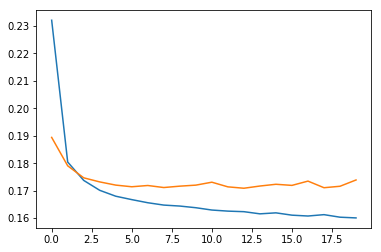

In [73]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y)

ss = StandardScaler()
Xs = ss.fit_transform(X_train)
Xts = ss.transform(X_test)

model = Sequential()

n_input = X_train.shape[1]
n_hidden = n_input

model.add(Dense(n_hidden, input_dim=n_input, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

history = model.fit(Xs, y_train, validation_data=(Xts, y_test), 
              epochs=20, batch_size=None, verbose=0)

train_loss = history.history['loss']
test_loss = history.history['val_loss']
plt.plot(train_loss, label='Training loss')
plt.plot(test_loss, label='Testing loss')

pred = model.predict_proba(Xts)

In [74]:
pred

array([[0.0009827 ],
       [0.17891204],
       [0.0072262 ],
       ...,
       [0.01936268],
       [0.00082255],
       [0.00273114]], dtype=float32)

# Testing on Test set


In [43]:
test = pd.read_csv('./assets/input/test.csv')

test['Date'] = pd.to_datetime(test['Date'])
test['Month'] = test['Date'].dt.month
test['Year'] = test['Date'].dt.year
test['Day'] = test['Date'].dt.day

test

In [46]:

weather_stn1 = weather[weather['Station']==1]
weather_stn2 = weather[weather['Station']==2]
weather_stn1 = weather_stn1.drop('Station', axis=1)
weather_stn2 = weather_stn2.drop('Station', axis=1)
weather = weather_stn1.merge(weather_stn2, on='Date')


weather = weather.replace('M', -1)
weather = weather.replace('-', -1)
weather = weather.replace('T', -1)
weather = weather.replace(' T', -1)
weather = weather.replace('  T', -1)

df_test = test.merge(weather, how = 'inner', on = 'Date', copy = False)

In [47]:
#drop rows with -1


#to match test set
X_t = df_test.drop(['Date', 'Address', 'Street', 'Trap', 'AddressNumberAndStreet', 'Latitude', 
             'Longitude', 'AddressAccuracy', 'Species', 'Id', 'SeaLevel_x', 'SeaLevel_y',
            'CodeSum_x', 'CodeSum_y'], axis = 1)

#make all numbers

mos_dum_test = pd.get_dummies(test['Species'], drop_first= True)
    
X_t = X_t.join(mos_dum_test)

for col_name in X_t:
    X_t[col_name] = pd.to_numeric(X_t[col_name])
X_t = X_t.ix[:,(X_t != -1).any(axis=0)]
    

/Users/rytizzle/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:17: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


In [63]:
ss = StandardScaler()
X_t_s = ss.fit_transform(X_t)

In [64]:
pred_probs_test = [x[1] for x in lr2.predict_proba(X_t_s)]

In [65]:
pred_probs_test

[0.002155611641576763,
 0.0016540332776100023,
 0.0009392989125409309,
 0.00045515221651989496,
 0.0007261189030215845,
 0.00036402298661053066,
 0.00017580574787224847,
 0.0009392989125409309,
 0.0022941296688579085,
 0.0017603771075108668,
 0.0009997358810973178,
 0.0004844530156872757,
 0.0007728499185143459,
 0.00038745954054919703,
 0.00018712675448889646,
 0.0009997358810973178,
 0.0024127408812063,
 0.001851443427070565,
 0.0010514948088063603,
 0.00050954801586301,
 0.0008128719275578382,
 0.00040753226041777486,
 0.00019682308224974954,
 0.0010514948088063603,
 0.0019956215852229694,
 0.0015312133717616913,
 0.000869505238901078,
 0.0004213174119749553,
 0.000672154701425409,
 0.0003369602027975018,
 0.00016273343558131513,
 0.000869505238901078,
 0.0020557035729678232,
 0.001577335564184649,
 0.0008957137786629035,
 0.0004340225875934167,
 0.0006924188435186896,
 0.00034712240028700813,
 0.00016764210494844538,
 0.0008957137786629035,
 0.0019720824050140176,
 0.00151314377269

In [66]:
submit = pd.read_csv('./assets/input/sampleSubmission.csv')

In [67]:
submit['WnvPresent'] = pred_probs_test

In [69]:
submit.to_csv('HSTTRT Submission $2.csv', index= False)

# Random Forest

In [70]:
pred_probs_test = [x[1] for x in clf.predict_proba(X_t_s)]

In [71]:
pred_probs_test

[0.046493797656405024,
 0.07564152236652237,
 0.038175823849353266,
 0.015718120768120767,
 0.038175823849353266,
 0.038175823849353266,
 0.038175823849353266,
 0.038175823849353266,
 0.10473711412254759,
 0.08974642857142862,
 0.0705263649748944,
 0.03410834443334444,
 0.0705263649748944,
 0.0705263649748944,
 0.0705263649748944,
 0.0705263649748944,
 0.09419003620046966,
 0.07332261904761905,
 0.06286446021298962,
 0.03711310633810633,
 0.06286446021298962,
 0.06286446021298962,
 0.06286446021298962,
 0.06286446021298962,
 0.11666825268811949,
 0.12669228785490402,
 0.083624202905511,
 0.06631779264910072,
 0.083624202905511,
 0.083624202905511,
 0.083624202905511,
 0.083624202905511,
 0.06043863892624632,
 0.07628437950937952,
 0.050038919087448536,
 0.026814549339549333,
 0.050038919087448536,
 0.050038919087448536,
 0.050038919087448536,
 0.050038919087448536,
 0.11666825268811949,
 0.12669228785490402,
 0.083624202905511,
 0.06631779264910072,
 0.083624202905511,
 0.0836242029055

In [72]:
submit = pd.read_csv('./assets/input/sampleSubmission.csv')
submit['WnvPresent'] = pred_probs_test
submit.to_csv('HSTTRT Submission $3.csv', index= False)

# Neural Networks

In [76]:
pred_probs_test = [x for x in model.predict_proba(X_t_s)]


In [79]:
model.predict_proba(X_t_s)

array([[0.03593371],
       [0.03557794],
       [0.02816156],
       ...,
       [0.00236652],
       [0.00063573],
       [0.00182228]], dtype=float32)

In [80]:
submit = pd.read_csv('./assets/input/sampleSubmission.csv')
submit['WnvPresent'] = model.predict_proba(X_t_s)
submit.to_csv('HSTTRT Submission $NeuralNetworks1.csv', index= False)